### spatial interaction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [2]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [3]:
data = pd.read_csv("OD_with_distances.csv")

In [4]:
data.tail(3)

,from,to,from_station,to_station,total_trips,distance,orig_pop,dest_jobs
69957,129,42,Upminster Bridge,Roding Valley,0,27281.56160,1482,313
69958,129,69,Upminster Bridge,South Ruislip,0,46997.72780,1482,1903
69959,129,71,Upminster Bridge,West Ruislip,0,50036.78401,1482,1334


In [5]:
data.rename(columns = {'total_trips':'Total', 
                       'distance':'Dist',
                      'from_station':'Orig',
                      'to_station':'Dest'}, inplace = True)

In [6]:
cdatasubmat = data.pivot_table(values ="Total", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,0.0,0.0,143.0,22.0,15.0,9.0,0.0,9.0,19.0,...,0.0,10.0,0.0,0.0,71.0,97.0,27.0,0.0,0.0,5910
Aldgate,0.0,NaN,0.0,0.0,0.0,46.0,12.0,22.0,0.0,271.0,...,0.0,0.0,18.0,0.0,7.0,0.0,43.0,4.0,0.0,9974
Aldgate East,22.0,0.0,NaN,0.0,0.0,121.0,0.0,0.0,0.0,21.0,...,8.0,592.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,11598
Alperton,192.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,3084
Amersham,0.0,52.0,0.0,83.0,NaN,4.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024


In [7]:
data["Total"].mean()

40.687993138936534

In [8]:
data["Total"].sum()

2846532

In [9]:
data["Total"].std()

185.9698019637742

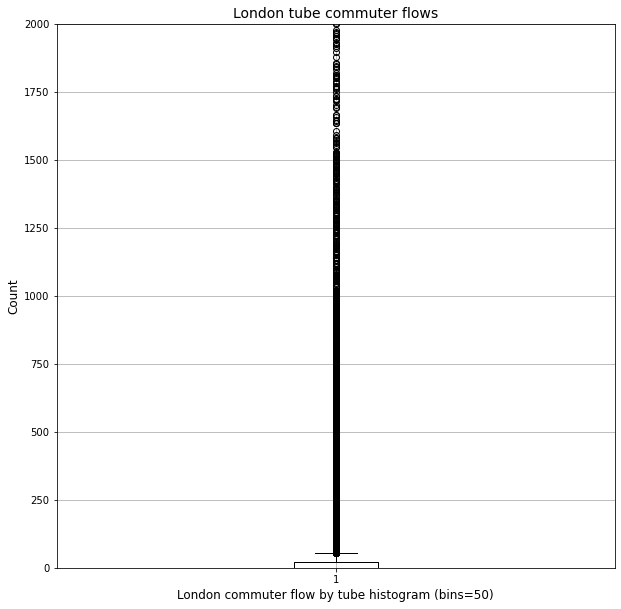

In [10]:
plt.subplots(figsize=(10,10))

plt.ylim(0,2000)

plt.boxplot(data["Total"])
plt.xlabel("London commuter flow by tube histogram (bins=50)", fontsize = 12)
plt.ylabel("Count", fontsize= 12)
plt.title("London tube commuter flows", fontsize = 14)
plt.grid(True)

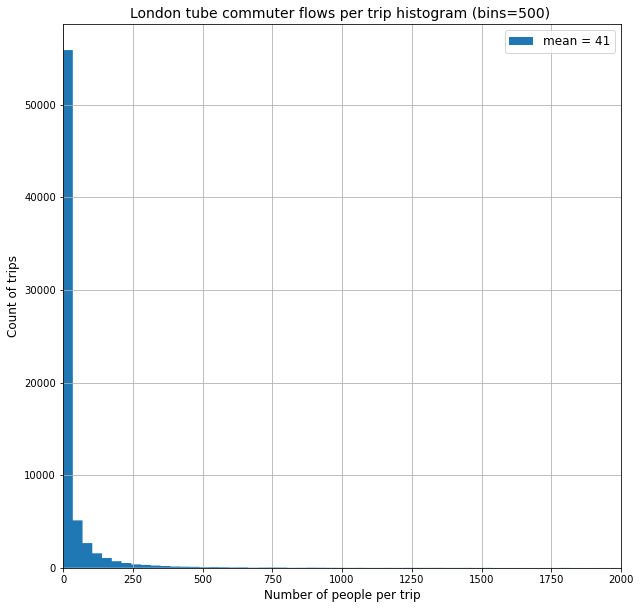

<Figure size 432x288 with 0 Axes>

In [11]:
plt.subplots(figsize=(10,10))

plt.xlim(0,2000)

plt.hist(data["Total"], label='mean = 41',histtype="stepfilled" , bins = 500)
plt.xlabel("Number of people per trip", fontsize = 12)
plt.ylabel("Count of trips", fontsize= 12)
plt.title("London tube commuter flows per trip histogram (bins=500) ", fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.grid(True)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p2_introhist.png', dpi=100)

### unconstrained modelling

In [12]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(data["Total"])

In [13]:
T2

2846532

In [14]:
Oi1_alpha = data["orig_pop"]**alpha
Dj2_gamma = data["dest_jobs"]**gamma
dist_beta = data["Dist"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [15]:
sum(T1)

643539.4898791129

In [16]:
k

4.42324370884328

In [17]:
#run the model and store of the new flow estimates in a new column
data["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
data["unconstrainedEst1"] = data["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(data["unconstrainedEst1"])

2842974

In [18]:
CalcRSqaured(data["Total"], data["unconstrainedEst1"])
# it shows the simple unconstrained model poorly represents the data

0.034141869459278

In [19]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96


In [22]:
## IMPORTANT: if I dont do the following, then it raises
## LinAlgError: SVD did not converge in Linear Least Squares
data = data.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["orig_pop", "dest_jobs", "Dist"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")
#
#create the formula
formula = 'Total ~ log_orig_pop + log_dest_jobs + log_Dist'

#run the regression
uncosim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()


In [24]:
# extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                69696
Model:                            GLM   Df Residuals:                    69692
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3533e+06
Date:                Mon, 26 Apr 2021   Deviance:                   4.5526e+06
Time:                        16:21:11   Pearson chi2:                 8.64e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.5264      0.014   -694.365

In [25]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["unconstrainedEst2"] = np.exp(K + alpha*data["log_orig_pop"] + gamma*data["log_dest_jobs"] -
                                      beta*data["log_Dist"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]

In [26]:
#round the numbers so that we don't get a half of a person
data["unconstrainedEst2"] = round(data["unconstrainedEst2"], 0)
#convert to integers
data["unconstrainedEst2"] = data["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(data["unconstrainedEst2"])

2846536

In [27]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat2 = data.pivot_table(values ="unconstrainedEst2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat2

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,23.0,27.0,10.0,2.0,33.0,14.0,6.0,4.0,53.0,...,25.0,39.0,13.0,10.0,23.0,4.0,16.0,8.0,5.0,5514
Aldgate,17.0,NaN,114.0,9.0,4.0,92.0,29.0,12.0,9.0,104.0,...,35.0,133.0,23.0,16.0,35.0,6.0,32.0,17.0,10.0,12364
Aldgate East,19.0,109.0,NaN,11.0,4.0,104.0,33.0,14.0,10.0,118.0,...,40.0,209.0,26.0,18.0,40.0,7.0,37.0,20.0,11.0,14115
Alperton,9.0,12.0,14.0,NaN,1.0,17.0,7.0,3.0,2.0,26.0,...,12.0,20.0,7.0,5.0,12.0,2.0,8.0,4.0,3.0,2752
Amersham,3.0,6.0,8.0,2.0,NaN,9.0,4.0,2.0,1.0,14.0,...,5.0,11.0,4.0,3.0,6.0,1.0,5.0,3.0,2.0,1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,5.0,10.0,12.0,3.0,1.0,15.0,6.0,3.0,2.0,24.0,...,10.0,18.0,6.0,4.0,25.0,NaN,7.0,4.0,2.0,2427
Wood Green,18.0,50.0,59.0,10.0,4.0,77.0,31.0,29.0,13.0,107.0,...,38.0,83.0,25.0,18.0,38.0,7.0,NaN,17.0,11.0,10864
Woodford,10.0,27.0,33.0,6.0,2.0,37.0,15.0,7.0,4.0,50.0,...,19.0,50.0,13.0,9.0,20.0,4.0,18.0,NaN,6.0,5646


In [28]:
CalcRSqaured(data["Total"], data["unconstrainedEst2"])

0.39925514401462125

In [29]:
CalcRMSE(data["Total"], data["unconstrainedEst2"])

144.45

### Doubly Constrained model

In [144]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'Total ~ Dest + Orig + log_Dist-1'
#run a production constrained sim
doubSim = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                69696
Model:                            GLM   Df Residuals:                    69167
Model Family:                 Poisson   Df Model:                          528
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2479e+06
Date:                Tue, 27 Apr 2021   Deviance:                   4.3420e+06
Time:                        10:14:41   Pearson chi2:                 6.92e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Dest[Act

In [137]:
# beta = 0.673
# K = 8.9656

In [138]:
#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = doubSim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted_doub"] = predictions_summary_frame["mean"]

In [139]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,A_i2,prodsimest4,prodsimest6,Ai3,Ai_n2,prodsimest7,prodsimest8,Ai4,Ai_n3,fitted_doub
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,0.000124,7.0,0.0,0.369790,0.00105,4.0,1.0,0.000358,0.233997,7.005330
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,0.000124,2.0,0.0,0.106721,0.00105,1.0,0.0,0.000062,0.233997,3.567925
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,0.000124,89.0,11.0,8.122324,0.00105,92.0,76.0,0.030048,0.233997,80.926427


In [140]:
#get the estimates
data["doubsimfitted"] = np.round(doubSim.predict())
#here's the matrix
cdatasubmat7 = data.pivot_table(values ="doubsimfitted", index="Orig", columns = "Dest",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,17.0,20.0,19.0,4.0,28.0,14.0,7.0,3.0,48.0,...,31.0,33.0,14.0,12.0,37.0,5.0,18.0,9.0,6.0,5916.0
Aldgate,11.0,NaN,108.0,7.0,3.0,70.0,21.0,9.0,5.0,64.0,...,23.0,125.0,16.0,12.0,30.0,4.0,26.0,14.0,8.0,9974.0
Aldgate East,13.0,104.0,NaN,8.0,4.0,80.0,24.0,11.0,6.0,74.0,...,27.0,256.0,18.0,14.0,35.0,5.0,30.0,17.0,9.0,11595.0
Alperton,17.0,9.0,11.0,NaN,3.0,15.0,8.0,4.0,2.0,24.0,...,16.0,18.0,9.0,6.0,19.0,3.0,10.0,5.0,4.0,3090.0
Amersham,6.0,7.0,8.0,4.0,NaN,11.0,6.0,4.0,1.0,17.0,...,8.0,14.0,7.0,5.0,13.0,2.0,9.0,5.0,3.0,2180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,6.0,8.0,9.0,4.0,2.0,12.0,7.0,3.0,1.0,21.0,...,12.0,15.0,6.0,5.0,78.0,NaN,8.0,4.0,3.0,2499.0
Wood Green,21.0,44.0,53.0,13.0,7.0,83.0,38.0,70.0,16.0,110.0,...,43.0,86.0,31.0,23.0,58.0,8.0,NaN,23.0,15.0,12706.0
Woodford,12.0,26.0,34.0,7.0,4.0,38.0,18.0,10.0,4.0,48.0,...,22.0,60.0,15.0,12.0,33.0,4.0,25.0,NaN,8.0,7024.0


In [141]:
cdatasubmat

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,0.0,0.0,143.0,22.0,15.0,9.0,0.0,9.0,19.0,...,0.0,10.0,0.0,0.0,71.0,97.0,27.0,0.0,0.0,5910
Aldgate,0.0,NaN,0.0,0.0,0.0,46.0,12.0,22.0,0.0,271.0,...,0.0,0.0,18.0,0.0,7.0,0.0,43.0,4.0,0.0,9974
Aldgate East,22.0,0.0,NaN,0.0,0.0,121.0,0.0,0.0,0.0,21.0,...,8.0,592.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,11598
Alperton,192.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,3084
Amersham,0.0,52.0,0.0,83.0,NaN,4.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024


In [142]:
CalcRSqaured(data["Total"],data["doubsimfitted"])

0.4074433630638419

In [143]:
CalcRMSE(data["Total"],data["doubsimfitted"])

143.597

### Orign Constrained 

In [30]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'Total ~ Orig + log_dest_jobs + log_Dist-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                69696
Model:                            GLM   Df Residuals:                    69430
Model Family:                 Poisson   Df Model:                          265
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3021e+06
Date:                Mon, 26 Apr 2021   Deviance:                   4.4503e+06
Time:                        16:21:31   Pearson chi2:                 7.75e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Orig[Acton T

In [31]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(data.groupby(["Orig"])["Total"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
data = data.merge(O_i, on = "Orig", how = "left" )

D_j = pd.DataFrame(data.groupby(["Dest"])["Total"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
data = data.merge(D_j, on = "Dest", how = "left" )

In [32]:
#We can do this by pulling out the paramaetr values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(Orig)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="Orig", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head(10)


/Users/yingchen/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,log_dest_jobs,log_Dist,unconstrainedEst2,fitted,O_i,D_j,alpha_i
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,7.993282,9.916235,10,10.041867,10822,2961,0.282856
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,7.232733,10.644440,4,3.855115,10822,1384,0.282856
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,9.785886,7.999413,103,103.338631,10822,17781,0.282856
3,77,198,Barbican,Archway,0,7319.210012,10822,7388,7,9.289336,8.907612,8.898258,33,33.476995,10822,7388,0.282856
4,77,244,Barbican,Arsenal,0,5676.906482,10822,1857,3,9.289336,7.526718,8.644162,11,10.596103,10822,1857,0.282856
5,77,0,Barbican,Baker Street,304,4777.357362,10822,26836,56,9.289336,10.197500,8.471643,126,125.592305,10822,26836,0.282856
6,77,25,Barbican,Bank,140,1265.540576,10822,99997,2989,9.289336,11.512895,7.143255,675,674.883710,10822,99997,0.282856
7,77,100,Barbican,Barons Court,4,10596.806120,10822,6498,3,9.289336,8.779250,9.268308,26,25.974240,10822,6498,0.282856
8,77,80,Barbican,Bayswater,21,7298.293871,10822,2718,2,9.289336,7.907652,8.895396,14,13.602757,10822,2718,0.282856
9,77,81,Barbican,Blackfriars,0,4114.451932,10822,19042,54,9.289336,9.854402,8.322261,97,97.454543,10822,19042,0.282856


In [33]:
prodSim.params

Orig[Acton Town]       0.197385
Orig[Aldgate]          0.218993
Orig[Aldgate East]     0.376175
Orig[Alperton]        -0.283972
Orig[Amersham]        -0.156297
                         ...   
Orig[Wood Green]       0.982227
Orig[Woodford]         0.566746
Orig[Woodside Park]   -0.013412
log_dest_jobs          0.868000
log_Dist              -0.537355
Length: 266, dtype: float64

In [34]:
alpha_i = prodSim.params[:264]
gamma = prodSim.params[264]
beta = prodSim.params[265]
beta

-0.5373547842814701

In [35]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_dest_jobs"] + beta*data["log_Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,log_dest_jobs,log_Dist,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,7.993282,9.916235,10,10.041867,10822,2961,0.282856,6.635850
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,7.232733,10.644440,4,3.855115,10822,1384,0.282856,2.318745
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,9.785886,7.999413,103,103.338631,10822,17781,0.282856,88.100638


In [36]:
#first round the estimates
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatasubmat3 = data.pivot_table(values ="prodsimest1", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat3

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,24.0,28.0,13.0,2.0,34.0,15.0,6.0,4.0,57.0,...,29.0,39.0,13.0,10.0,25.0,5.0,16.0,8.0,5.0,5909.0
Aldgate,11.0,NaN,114.0,6.0,2.0,77.0,21.0,9.0,7.0,78.0,...,24.0,121.0,16.0,11.0,23.0,4.0,23.0,12.0,7.0,9976.0
Aldgate East,13.0,113.0,NaN,7.0,2.0,89.0,25.0,10.0,8.0,90.0,...,28.0,221.0,19.0,13.0,26.0,5.0,26.0,14.0,8.0,11586.0
Alperton,13.0,13.0,15.0,NaN,2.0,18.0,8.0,4.0,2.0,29.0,...,15.0,21.0,8.0,6.0,13.0,3.0,9.0,4.0,3.0,3080.0
Amersham,5.0,10.0,11.0,3.0,NaN,14.0,6.0,3.0,2.0,21.0,...,8.0,16.0,7.0,4.0,9.0,2.0,7.0,4.0,3.0,2176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,6.0,11.0,12.0,3.0,1.0,15.0,7.0,3.0,2.0,25.0,...,11.0,17.0,6.0,5.0,38.0,NaN,7.0,4.0,2.0,2493.0
Wood Green,20.0,59.0,70.0,12.0,4.0,95.0,37.0,46.0,19.0,127.0,...,43.0,96.0,29.0,21.0,41.0,8.0,NaN,18.0,13.0,12710.0
Woodford,12.0,35.0,44.0,7.0,3.0,46.0,18.0,9.0,6.0,60.0,...,23.0,65.0,15.0,11.0,23.0,5.0,21.0,NaN,7.0,7025.0


In [37]:
CalcRSqaured(data["Total"], data["prodsimest1"])

0.3990153172525453

In [38]:
CalcRMSE(data["Total"], data["prodsimest1"])

144.437

### Scenario A: Canary Wharf has a 50% decrease in jobs

In [39]:
def new_sal(row):
    if row["Dest"] == "Canary Wharf":
        val = row["dest_jobs"]*0.5
    else:
        val = row["dest_jobs"]
    return val
        
data["s1"] = data.apply(new_sal, axis =1)

In [40]:
beta

-0.5373547842814701

In [41]:
data["prodsimest2"] = np.exp(data["alpha_i"]+gamma*np.log(data["s1"]) + beta*data["log_Dist"])   

data["prodsimest2"] = round(data["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatasubmat4 = data.pivot_table(values ="prodsimest2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat4.tail(3)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Woodford,12.0,35.0,44.0,7.0,3.0,46.0,18.0,9.0,6.0,60.0,...,23.0,65.0,15.0,11.0,23.0,5.0,21.0,NaN,7.0,6947.0
Woodside Park,7.0,18.0,22.0,4.0,2.0,28.0,18.0,5.0,4.0,39.0,...,14.0,30.0,10.0,7.0,14.0,3.0,13.0,6.0,NaN,3992.0
All,4734.0,15087.0,17937.0,2539.0,833.0,20093.0,7265.0,3083.0,2466.0,29755.0,...,9691.0,23502.0,6113.0,4215.0,8529.0,1749.0,7992.0,3920.0,2421.0,2822813.0


In [42]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["dest_jobs"]**gamma
dist_beta = data["Dist"]**beta
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="Orig", right_index=True, how="left")

In [43]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1,s1,prodsimest2,Ai1,A_i
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,10,10.041867,10822,2961,0.282856,7.0,2961.0,7.0,5.000966,0.000123
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,4,3.855115,10822,1384,0.282856,2.0,1384.0,2.0,1.747472,0.000123
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,103,103.338631,10822,17781,0.282856,88.0,17781.0,88.0,66.395147,0.000123


In [44]:
beta

-0.5373547842814701

In [45]:
#to check everything works, recreate the original estimates
data["prodsimest3"] = data["A_i"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest3"] = round(data["prodsimest3"])
#check
data[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,7.0,7.0
1,2.0,2.0
2,88.0,88.0
3,25.0,25.0
4,9.0,9.0
...,...,...
69691,3.0,3.0
69692,0.0,0.0
69693,0.0,0.0
69694,1.0,1.0


In [46]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = data["s1"]**gamma
#calcualte the first stage of the Ai values
data["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="Orig", right_index=True, how="left")

In [47]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,O_i,D_j,alpha_i,prodsimest1,s1,prodsimest2,Ai1,A_i,prodsimest3,A_i2
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,10822,2961,0.282856,7.0,2961.0,7.0,5.000966,0.000123,7.0,0.000124
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,10822,1384,0.282856,2.0,1384.0,2.0,1.747472,0.000123,2.0,0.000124
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,10822,17781,0.282856,88.0,17781.0,88.0,66.395147,0.000123,88.0,0.000124


In [48]:
#to check everything works, recreate the original estimates
data["prodsimest4"] = data["A_i2"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest4"] = round(data["prodsimest4"])
#check
data[["prodsimest1", "prodsimest4"]]

,prodsimest1,prodsimest4
0,7.0,7.0
1,2.0,2.0
2,88.0,89.0
3,25.0,26.0
4,9.0,9.0
...,...,...
69691,3.0,3.0
69692,0.0,0.0
69693,0.0,0.0
69694,1.0,1.0


In [49]:
cdatasubmat5 = data.pivot_table(values ="prodsimest4", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat5.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,6.0,11.0,13.0,3.0,1.0,15.0,7.0,3.0,2.0,25.0,...,11.0,17.0,6.0,5.0,38.0,NaN,7.0,4.0,2.0,2498.0
Wood Green,21.0,60.0,70.0,12.0,4.0,96.0,37.0,47.0,19.0,128.0,...,43.0,97.0,30.0,21.0,41.0,8.0,NaN,18.0,13.0,12719.0
Woodford,12.0,36.0,44.0,7.0,3.0,46.0,18.0,9.0,6.0,60.0,...,23.0,65.0,15.0,11.0,24.0,5.0,22.0,NaN,7.0,7030.0
Woodside Park,7.0,19.0,22.0,4.0,2.0,29.0,19.0,5.0,4.0,39.0,...,14.0,31.0,10.0,7.0,14.0,3.0,14.0,6.0,NaN,4026.0
All,4768.0,15218.0,18081.0,2553.0,841.0,20271.0,7326.0,3101.0,2483.0,29990.0,...,9783.0,23710.0,6163.0,4246.0,8603.0,1764.0,8054.0,3955.0,2441.0,2846457.0


In [50]:
cdatasubmat.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024
Woodside Park,0.0,11.0,0.0,0.0,0.0,73.0,78.0,0.0,0.0,49.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4025
All,5080.0,12048.0,14650.0,2961.0,1384.0,17781.0,7388.0,3548.0,1857.0,26836.0,...,10048.0,22124.0,6527.0,4732.0,12057.0,1778.0,9584.0,4985.0,2880.0,2846532


In [51]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,D_j,alpha_i,prodsimest1,s1,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,2961,0.282856,7.0,2961.0,7.0,5.000966,0.000123,7.0,0.000124,7.0
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,1384,0.282856,2.0,1384.0,2.0,1.747472,0.000123,2.0,0.000124,2.0
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,17781,0.282856,88.0,17781.0,88.0,66.395147,0.000123,88.0,0.000124,89.0


### Scenario B: beta = 0.8 & Canary Wharf has a 50% decrease in jobs

In [52]:
beta = -0.8

In [53]:
data["prodsimest6"] = np.exp(data["alpha_i"]+gamma*np.log(data["s1"]) +beta*data["log_Dist"])   

data["prodsimest6"] = round(data["prodsimest6"],0)
#now we can convert the pivot table into a matrix
cdatasubmat6 = data.pivot_table(values ="prodsimest6", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat6.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,6.0,NaN,1.0,0.0,0.0,181.0
Wood Green,1.0,5.0,6.0,1.0,0.0,9.0,3.0,6.0,2.0,11.0,...,3.0,8.0,2.0,2.0,3.0,1.0,NaN,1.0,1.0,1072.0
Woodford,1.0,3.0,4.0,0.0,0.0,4.0,1.0,1.0,0.0,4.0,...,2.0,5.0,1.0,1.0,2.0,0.0,1.0,NaN,0.0,531.0
Woodside Park,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,...,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,294.0
All,396.0,1676.0,1981.0,183.0,21.0,2095.0,652.0,227.0,218.0,3203.0,...,883.0,2416.0,532.0,336.0,664.0,113.0,674.0,299.0,162.0,283772.0


In [54]:
# #calculate some new wj^alpha and d_ij^beta values
# Dj2_gamma = data["dest_jobs"]**gamma
# dist_beta = data["Dist"]**beta
# #calcualte the first stage of the Ai values
# data["Ai1"] = Dj2_gamma * dist_beta
# #now do the sum over all js bit
# A_i = pd.DataFrame(data.groupby(["Orig"])["Ai1"].agg(np.sum))
# #now divide into 1
# A_i["Ai1"] = 1/A_i["Ai1"]
# A_i.rename(columns={"Ai1":"Ai_n"}, inplace=True)
# #and write the A_i values back into the dataframe
# data = data.merge(A_i, left_on="Orig", right_index=True, how="left")

In [55]:
# #to check everything works, recreate the original estimates
# data["prodsimest6"] = data["Ai_n"]*data["O_i"]*Dj2_gamma*dist_beta
# #round
# data["prodsimest6"] = round(data["prodsimest6"])

In [56]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta = data["Dist"]**beta
Dj3_gamma = data["s1"]**gamma
#calcualte the first stage of the Ai values
data["Ai3"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["Orig"])["Ai3"].agg(np.sum))
#now divide into 1
A_i["Ai3"] = 1/A_i["Ai3"]
A_i.rename(columns={"Ai3":"Ai_n2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="Orig", right_index=True, how="left")

In [57]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,s1,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,prodsimest6,Ai3,Ai_n2
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,2961.0,7.0,5.000966,0.000123,7.0,0.000124,7.0,0.0,0.369790,0.00105
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,1384.0,2.0,1.747472,0.000123,2.0,0.000124,2.0,0.0,0.106721,0.00105
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,17781.0,88.0,66.395147,0.000123,88.0,0.000124,89.0,11.0,8.122324,0.00105


In [58]:
#to check everything works, recreate the original estimates
data["prodsimest7"] = data["Ai_n2"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest7"] = round(data["prodsimest7"])

In [59]:
s2 = data.pivot_table(values ="prodsimest7", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
s2.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,6.0,10.0,12.0,3.0,1.0,15.0,6.0,2.0,2.0,26.0,...,11.0,16.0,5.0,4.0,67.0,NaN,6.0,3.0,2.0,2501.0
Wood Green,18.0,59.0,69.0,9.0,3.0,101.0,36.0,69.0,25.0,131.0,...,40.0,94.0,27.0,19.0,34.0,7.0,NaN,15.0,11.0,12714.0
Woodford,10.0,37.0,47.0,6.0,2.0,46.0,17.0,8.0,5.0,57.0,...,21.0,70.0,14.0,10.0,20.0,4.0,19.0,NaN,6.0,7023.0
Woodside Park,6.0,18.0,22.0,3.0,1.0,30.0,23.0,5.0,4.0,40.0,...,14.0,30.0,9.0,6.0,13.0,2.0,13.0,5.0,NaN,4024.0
All,4306.0,16189.0,19249.0,2133.0,560.0,20567.0,6625.0,2608.0,2458.0,31467.0,...,9122.0,24008.0,5515.0,3591.0,6909.0,1508.0,7052.0,3272.0,1980.0,2846652.0


In [60]:
cdatasubmat.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024
Woodside Park,0.0,11.0,0.0,0.0,0.0,73.0,78.0,0.0,0.0,49.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4025
All,5080.0,12048.0,14650.0,2961.0,1384.0,17781.0,7388.0,3548.0,1857.0,26836.0,...,10048.0,22124.0,6527.0,4732.0,12057.0,1778.0,9584.0,4985.0,2880.0,2846532


### Scenario C: beta = 1.5 & Canary Wharf has a 50% decrease in jobs

In [61]:
beta = -1.5

In [62]:
data["prodsimest8"] = np.exp(data["alpha_i"]+gamma*np.log(data["s1"]) +beta*data["log_Dist"])   

data["prodsimest8"] = round(data["prodsimest8"],0)
#now we can convert the pivot table into a matrix
cdatasubmat8 = data.pivot_table(values ="prodsimest8", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdatasubmat8.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
Wood Green,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
Woodford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
Woodside Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
All,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0


In [63]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta = data["Dist"]**beta
Dj3_gamma = data["s1"]**gamma
#calcualte the first stage of the Ai values
data["Ai4"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["Orig"])["Ai4"].agg(np.sum))
#now divide into 1
A_i["Ai4"] = 1/A_i["Ai4"]
A_i.rename(columns={"Ai4":"Ai_n3"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="Orig", right_index=True, how="left")

In [64]:
data.head(3)

,from,to,Orig,Dest,Total,Dist,orig_pop,dest_jobs,unconstrainedEst1,log_orig_pop,...,prodsimest3,A_i2,prodsimest4,prodsimest6,Ai3,Ai_n2,prodsimest7,prodsimest8,Ai4,Ai_n3
0,77,238,Barbican,Alperton,0,20256.589910,10822,2961,0,9.289336,...,7.0,0.000124,7.0,0.0,0.369790,0.00105,4.0,0.0,0.000358,0.233997
1,77,172,Barbican,Amersham,7,41958.668850,10822,1384,0,9.289336,...,2.0,0.000124,2.0,0.0,0.106721,0.00105,1.0,0.0,0.000062,0.233997
2,77,196,Barbican,Angel,0,2979.209677,10822,17781,96,9.289336,...,88.0,0.000124,89.0,11.0,8.122324,0.00105,92.0,0.0,0.030048,0.233997


In [65]:
#to check everything works, recreate the original estimates
data["prodsimest8"] = data["Ai_n3"]*data["O_i"]*Dj3_gamma*dist_beta
#round
data["prodsimest8"] = round(data["prodsimest8"])

In [66]:
s3 = data.pivot_table(values ="prodsimest8", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
s3.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,5.0,8.0,9.0,2.0,0.0,11.0,4.0,1.0,1.0,24.0,...,11.0,12.0,4.0,3.0,265.0,NaN,4.0,1.0,1.0,2510.0
Wood Green,10.0,49.0,57.0,4.0,1.0,100.0,28.0,165.0,39.0,118.0,...,27.0,73.0,18.0,11.0,17.0,4.0,NaN,7.0,6.0,12712.0
Woodford,6.0,36.0,48.0,3.0,1.0,41.0,12.0,5.0,4.0,45.0,...,14.0,77.0,9.0,6.0,12.0,2.0,13.0,NaN,4.0,7026.0
Woodside Park,4.0,16.0,19.0,2.0,0.0,29.0,33.0,3.0,3.0,37.0,...,10.0,25.0,7.0,4.0,8.0,2.0,9.0,3.0,NaN,4021.0
All,4040.0,17750.0,20933.0,1533.0,235.0,18755.0,4975.0,2101.0,2971.0,33438.0,...,8157.0,22498.0,4524.0,2483.0,3895.0,1286.0,6246.0,2476.0,1513.0,2846295.0


In [67]:
cdatasubmat.tail(5)

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024
Woodside Park,0.0,11.0,0.0,0.0,0.0,73.0,78.0,0.0,0.0,49.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4025
All,5080.0,12048.0,14650.0,2961.0,1384.0,17781.0,7388.0,3548.0,1857.0,26836.0,...,10048.0,22124.0,6527.0,4732.0,12057.0,1778.0,9584.0,4985.0,2880.0,2846532


### Anlysis

In [68]:
# flows after modelling
# actual total flow = 2846532
flow = cdatasubmat.iloc[[-1]]
flow = flow.T
flow.index = flow.index.set_names(['Destination_station'])
flow = flow.rename(columns={'All': 'Total_Commuters'})
flow = flow.rename_axis(columns=None)
flow.reset_index(inplace=True)
flow.drop(flow.tail(1).index,inplace=True) 
flow

,Destination_station,Total_Commuters
0,Acton Town,5080.0
1,Aldgate,12048.0
2,Aldgate East,14650.0
3,Alperton,2961.0
4,Amersham,1384.0
...,...,...
260,Wimbledon,12057.0
261,Wimbledon Park,1778.0
262,Wood Green,9584.0
263,Woodford,4985.0


In [69]:
df = cdatasubmat5.iloc[[-1]]
df = df.T
df.index = df.index.set_names(['Destination_station'])
df = df.rename(columns={'All': 'Total_Commuters_ScenarioA'})
df = df.rename_axis(columns=None)
df.reset_index(inplace=True)
df.drop(df.tail(1).index,inplace=True) 
df

,Destination_station,Total_Commuters_ScenarioA
0,Acton Town,4768.0
1,Aldgate,15218.0
2,Aldgate East,18081.0
3,Alperton,2553.0
4,Amersham,841.0
...,...,...
260,Wimbledon,8603.0
261,Wimbledon Park,1764.0
262,Wood Green,8054.0
263,Woodford,3955.0


In [70]:
# merge 
data_all = pd.merge(flow,df, left_on = "Destination_station", 
                right_on='Destination_station',how = "left")
data_all

,Destination_station,Total_Commuters,Total_Commuters_ScenarioA
0,Acton Town,5080.0,4768.0
1,Aldgate,12048.0,15218.0
2,Aldgate East,14650.0,18081.0
3,Alperton,2961.0,2553.0
4,Amersham,1384.0,841.0
...,...,...,...
260,Wimbledon,12057.0,8603.0
261,Wimbledon Park,1778.0,1764.0
262,Wood Green,9584.0,8054.0
263,Woodford,4985.0,3955.0


In [71]:
df2 = s2.iloc[[-1]]
df2 = df2.T
df2.index = df2.index.set_names(['Destination_station'])
df2 = df2.rename(columns={'All': 'Total_Commuters_ScenarioB'})
df2 = df2.rename_axis(columns=None)
df2.reset_index(inplace=True)
df2.drop(df2.tail(1).index,inplace=True) 
df2

,Destination_station,Total_Commuters_ScenarioB
0,Acton Town,4306.0
1,Aldgate,16189.0
2,Aldgate East,19249.0
3,Alperton,2133.0
4,Amersham,560.0
...,...,...
260,Wimbledon,6909.0
261,Wimbledon Park,1508.0
262,Wood Green,7052.0
263,Woodford,3272.0


In [72]:
# merge 
data_all = pd.merge(data_all,df2,left_on = "Destination_station", 
                right_on='Destination_station',how = "left")
data_all

,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB
0,Acton Town,5080.0,4768.0,4306.0
1,Aldgate,12048.0,15218.0,16189.0
2,Aldgate East,14650.0,18081.0,19249.0
3,Alperton,2961.0,2553.0,2133.0
4,Amersham,1384.0,841.0,560.0
...,...,...,...,...
260,Wimbledon,12057.0,8603.0,6909.0
261,Wimbledon Park,1778.0,1764.0,1508.0
262,Wood Green,9584.0,8054.0,7052.0
263,Woodford,4985.0,3955.0,3272.0


In [73]:
df3 = s3.iloc[[-1]]
df3 = df3.T
df3.index = df3.index.set_names(['Destination_station'])
df3 = df3.rename(columns={'All': 'Total_Commuters_ScenarioC'})
df3 = df3.rename_axis(columns=None)
df3.reset_index(inplace=True)
df3.drop(df3.tail(1).index,inplace=True) 
df3

,Destination_station,Total_Commuters_ScenarioC
0,Acton Town,4040.0
1,Aldgate,17750.0
2,Aldgate East,20933.0
3,Alperton,1533.0
4,Amersham,235.0
...,...,...
260,Wimbledon,3895.0
261,Wimbledon Park,1286.0
262,Wood Green,6246.0
263,Woodford,2476.0


In [74]:
# merge 
data_all = pd.merge(data_all,df3,left_on = "Destination_station", 
                right_on='Destination_station',how = "left")
data_all

,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC
0,Acton Town,5080.0,4768.0,4306.0,4040.0
1,Aldgate,12048.0,15218.0,16189.0,17750.0
2,Aldgate East,14650.0,18081.0,19249.0,20933.0
3,Alperton,2961.0,2553.0,2133.0,1533.0
4,Amersham,1384.0,841.0,560.0,235.0
...,...,...,...,...,...
260,Wimbledon,12057.0,8603.0,6909.0,3895.0
261,Wimbledon Park,1778.0,1764.0,1508.0,1286.0
262,Wood Green,9584.0,8054.0,7052.0,6246.0
263,Woodford,4985.0,3955.0,3272.0,2476.0


In [75]:
# calculate change in flows for each scenario
data_all['Change_in_A(%)'] = (data_all['Total_Commuters_ScenarioA'] - data_all['Total_Commuters'])/ data_all['Total_Commuters']*100
data_all['Change_in_B(%)'] = (data_all['Total_Commuters_ScenarioB'] - data_all['Total_Commuters'])/ data_all['Total_Commuters']*100
data_all['Change_in_C(%)'] = (data_all['Total_Commuters_ScenarioC'] - data_all['Total_Commuters'])/ data_all['Total_Commuters']*100
data_all.round(0)

,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC,Change_in_A(%),Change_in_B(%),Change_in_C(%)
0,Acton Town,5080.0,4768.0,4306.0,4040.0,-6.0,-15.0,-20.0
1,Aldgate,12048.0,15218.0,16189.0,17750.0,26.0,34.0,47.0
2,Aldgate East,14650.0,18081.0,19249.0,20933.0,23.0,31.0,43.0
3,Alperton,2961.0,2553.0,2133.0,1533.0,-14.0,-28.0,-48.0
4,Amersham,1384.0,841.0,560.0,235.0,-39.0,-60.0,-83.0
...,...,...,...,...,...,...,...,...
260,Wimbledon,12057.0,8603.0,6909.0,3895.0,-29.0,-43.0,-68.0
261,Wimbledon Park,1778.0,1764.0,1508.0,1286.0,-1.0,-15.0,-28.0
262,Wood Green,9584.0,8054.0,7052.0,6246.0,-16.0,-26.0,-35.0
263,Woodford,4985.0,3955.0,3272.0,2476.0,-21.0,-34.0,-50.0


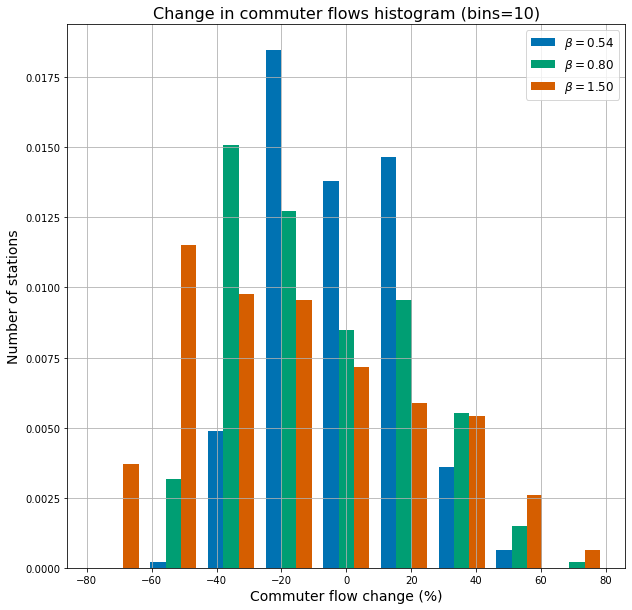

<Figure size 432x288 with 0 Axes>

In [99]:
# histogram
plt.subplots(figsize=(10,10))
plt.style.use('seaborn-colorblind')

x = data_all["Change_in_A(%)"]
y = data_all["Change_in_B(%)"]
z = data_all["Change_in_C(%)"]

bins = np.linspace(-80, 80, 10)

plt.hist([x,y,z],bins,label=['$\\beta=0.54$', '$\\beta=0.80$', '$\\beta=1.50$'],density=True, histtype='bar')
plt.xlabel("Commuter flow change (%)", fontsize = 14)
plt.ylabel("Number of stations", fontsize= 14)
plt.title("Change in commuter flows histogram (bins=10)", fontsize = 16)
plt.legend(loc='upper right', fontsize = 12)
plt.grid(True)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p2_scenario_hist.png', dpi=100)

In [77]:
# extract top 10 stations with MAX change in flows for each scenario
A_max = data_all.sort_values(by=['Change_in_A(%)'],ascending=False).head(10)
B_max = data_all.sort_values(by=['Change_in_B(%)'],ascending=False).head(10)
C_max = data_all.sort_values(by=['Change_in_C(%)'],ascending=False).head(10)

In [88]:
A_max.reset_index(inplace=True)
A_max

,level_0,index,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC,Change_in_A(%),Change_in_B(%),Change_in_C(%)
0,0,130,Lambeth North,2613.0,4188.0,4504.0,5249.0,60.275545,72.368925,100.880214
1,1,120,Kensington (Olympia),398.0,625.0,585.0,477.0,57.035176,46.984925,19.849246
2,2,184,Regent's Park,3965.0,5762.0,5997.0,5952.0,45.321564,51.248424,50.113493
3,3,116,Hyde Park Corner,4617.0,6497.0,6722.0,6606.0,40.719082,45.592376,43.079922
4,4,87,Goodge Street,8455.0,11694.0,12517.0,13366.0,38.308693,48.042578,58.083974
5,5,69,Edgware Road (B),4474.0,6148.0,6434.0,7413.0,37.416182,43.808672,65.690657
6,6,192,Russell Square,8739.0,11886.0,12616.0,13291.0,36.010985,44.364344,52.088340
7,7,149,Mornington Crescent,5023.0,6825.0,7028.0,7221.0,35.874975,39.916385,43.758710
8,8,24,Borough,5743.0,7803.0,8127.0,8450.0,35.869754,41.511405,47.135643
9,9,16,Bayswater,2718.0,3685.0,3713.0,3969.0,35.577631,36.607800,46.026490


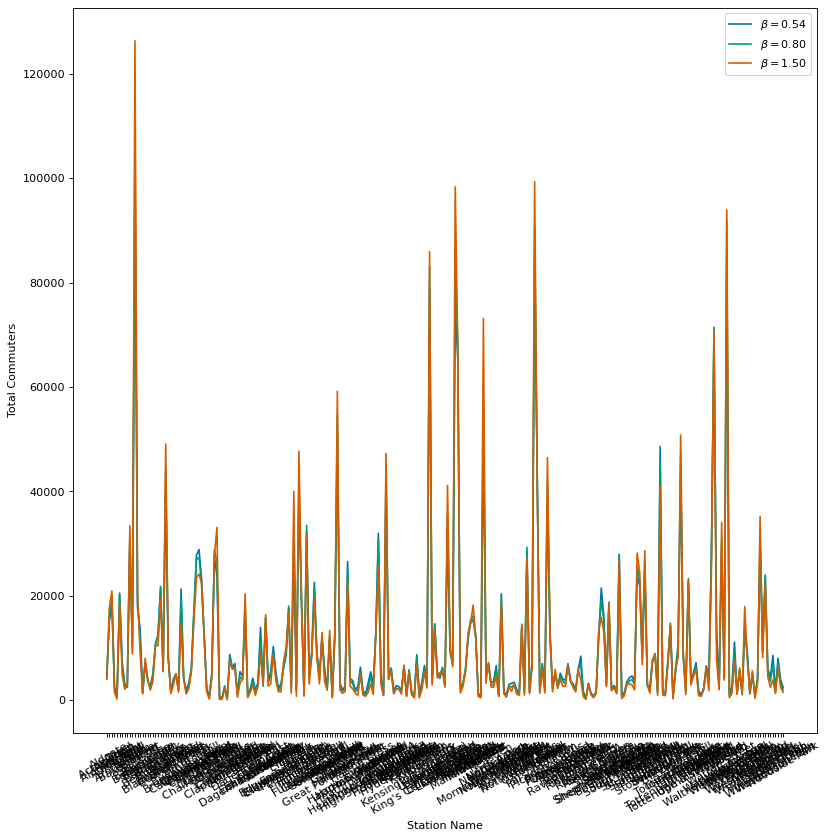

In [135]:
from matplotlib.pyplot import figure
figure(figsize=(12,12), dpi=80)
fig.suptitle('Stations with Most Increased Flows', fontsize=14)
plt.style.use('seaborn-colorblind')

x = data_all['Destination_station']
y1 = data_all['Total_Commuters_ScenarioA']
y2 = data_all['Total_Commuters_ScenarioB']
y3 = data_all['Total_Commuters_ScenarioC']

plt.plot(x, y1, label='$\\beta=0.54$')
plt.plot(x, y2, label='$\\beta=0.80$')
plt.plot(x, y3, label='$\\beta=1.50$')

plt.legend(loc='upper right', fontsize = 10)

plt.xticks(rotation=30)

plt.xlabel('Station Name', fontsize = 10)
plt.ylabel('Total Commuters', fontsize = 10)

plt.show()
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig('p2_impact.png', dpi=100)

In [89]:
B_max.reset_index(inplace=True)
B_max

,index,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC,Change_in_A(%),Change_in_B(%),Change_in_C(%)
0,130,Lambeth North,2613.0,4188.0,4504.0,5249.0,60.275545,72.368925,100.880214
1,184,Regent's Park,3965.0,5762.0,5997.0,5952.0,45.321564,51.248424,50.113493
2,87,Goodge Street,8455.0,11694.0,12517.0,13366.0,38.308693,48.042578,58.083974
3,43,Charing Cross,17958.0,23828.0,26562.0,33096.0,32.687382,47.911794,84.296692
4,120,Kensington (Olympia),398.0,625.0,585.0,477.0,57.035176,46.984925,19.849246
5,54,Covent Garden,12670.0,17150.0,18614.0,20404.0,35.359116,46.913970,61.041831
6,116,Hyde Park Corner,4617.0,6497.0,6722.0,6606.0,40.719082,45.592376,43.079922
7,73,Embankment,21813.0,28294.0,31620.0,40007.0,29.711640,44.959428,83.408976
8,192,Russell Square,8739.0,11886.0,12616.0,13291.0,36.010985,44.364344,52.088340
9,69,Edgware Road (B),4474.0,6148.0,6434.0,7413.0,37.416182,43.808672,65.690657


In [90]:
C_max.reset_index(inplace=True)
C_max

,index,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC,Change_in_A(%),Change_in_B(%),Change_in_C(%)
0,130,Lambeth North,2613.0,4188.0,4504.0,5249.0,60.275545,72.368925,100.880214
1,43,Charing Cross,17958.0,23828.0,26562.0,33096.0,32.687382,47.911794,84.296692
2,73,Embankment,21813.0,28294.0,31620.0,40007.0,29.711640,44.959428,83.408976
3,69,Edgware Road (B),4474.0,6148.0,6434.0,7413.0,37.416182,43.808672,65.690657
4,147,Moorgate,44294.0,50602.0,56670.0,73133.0,14.241206,27.940579,65.108141
5,133,Leicester Square,25314.0,31954.0,35299.0,41123.0,26.230544,39.444576,62.451608
6,54,Covent Garden,12670.0,17150.0,18614.0,20404.0,35.359116,46.913970,61.041831
7,8,Arsenal,1857.0,2483.0,2458.0,2971.0,33.710285,32.364028,59.989230
8,87,Goodge Street,8455.0,11694.0,12517.0,13366.0,38.308693,48.042578,58.083974
9,192,Russell Square,8739.0,11886.0,12616.0,13291.0,36.010985,44.364344,52.088340


In [81]:
# extract top 10 stations with MIN change in flows for each scenario
A_min = data_all.sort_values(by=['Change_in_A(%)'],ascending=True).head(10)
B_min = data_all.sort_values(by=['Change_in_B(%)'],ascending=True).head(10)
C_min = data_all.sort_values(by=['Change_in_C(%)'],ascending=True).head(10)

In [82]:
A_min

,Destination_station,Total_Commuters,Total_Commuters_ScenarioA,Total_Commuters_ScenarioB,Total_Commuters_ScenarioC,Change_in_A(%),Change_in_B(%),Change_in_C(%)
36,Canary Wharf,68117.0,28877.0,27388.0,24207.0,-57.606765,-59.792710,-64.462616
235,Uxbridge,7914.0,4550.0,3316.0,1833.0,-42.506950,-58.099570,-76.838514
44,Chesham,1216.0,727.0,472.0,167.0,-40.213816,-61.184211,-86.266447
4,Amersham,1384.0,841.0,560.0,235.0,-39.234104,-59.537572,-83.020231
74,Epping,3894.0,2398.0,1691.0,770.0,-38.418079,-56.574217,-80.225989
102,Heathrow Terminals 123,5169.0,3289.0,2431.0,1505.0,-36.370671,-52.969627,-70.884117
186,Rickmansworth,2618.0,1690.0,1212.0,693.0,-35.446906,-53.705118,-73.529412
243,Watford,1958.0,1290.0,918.0,498.0,-34.116445,-53.115424,-74.565884
40,Chalfont & Latimer,929.0,626.0,420.0,214.0,-32.615716,-54.790097,-76.964478
238,Walthamstow Central,20687.0,14049.0,11594.0,7824.0,-32.087785,-43.955141,-62.179146


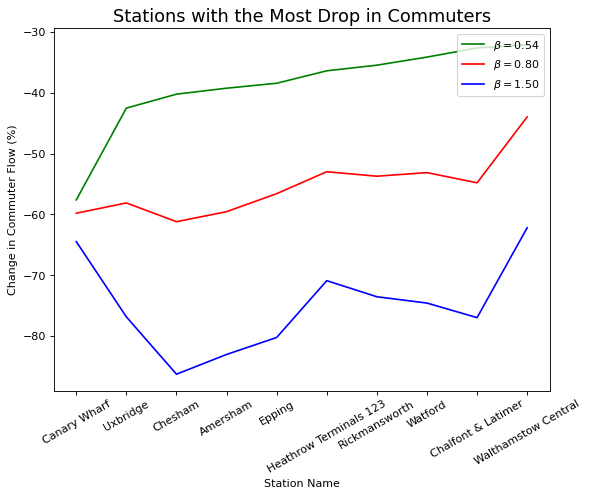

In [151]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
fig.suptitle('Stations with Most Increased Flows', fontsize=14)
plt.style.use('seaborn-colorblind')

x = A_min['Destination_station']
y1 = A_min['Change_in_A(%)']
y2 = A_min['Change_in_B(%)']
y3 = A_min['Change_in_C(%)']

plt.plot(x, y1, color='g',label='$\\beta=0.54$')
plt.plot(x, y2, color='r',label='$\\beta=0.80$')
plt.plot(x, y3, color='b',label='$\\beta=1.50$')

plt.legend(loc='upper right', fontsize = 10)
plt.title("Stations with the Most Drop in Commuters", fontsize = 16)

plt.xticks(rotation=30)

plt.xlabel('Station Name', fontsize = 10)
plt.ylabel('Change in Commuter Flow (%)', fontsize = 10)

plt.show()
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig('p2_impact.png', dpi=100)

### plot

In [83]:
import scipy.stats as sps

In [84]:
data_all["Total_Commuters_ScenarioB"].max()

108775.0

y = 0.987 x + 135.918
Rsq =  0.9517531630270054
p-value =  3.7875422366841823e-175


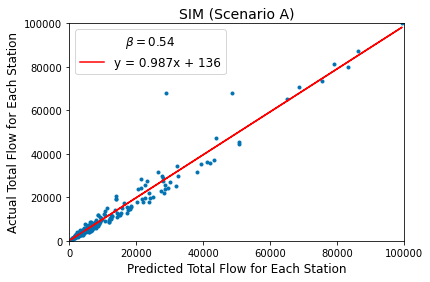

<Figure size 432x288 with 0 Axes>

In [152]:
# s1 vs. original
X = data_all["Total_Commuters_ScenarioA"]
Y = data_all["Total_Commuters"]

plt.xlabel("Predicted Total Flow for Each Station", fontsize=12)
plt.ylabel("Actual Total Flow for Each Station", fontsize=12)
plt.title("SIM (Scenario A)", fontsize=14)

plt.plot(X,Y,'.')
plt.xlim(0,100000)
plt.ylim(0,100000)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

plt.plot(X, X*slope + intercept, 'r', label = 'y = 0.987x + 136') 

plt.legend(fontsize = 12, title = "$\\beta=0.54$", title_fontsize=12)

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p2_SA.png', dpi=100)

y = 0.911 x + 952.705
Rsq =  0.9332064883950552
p-value =  1.442117505884735e-156


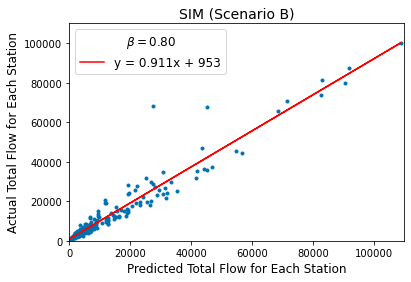

<Figure size 432x288 with 0 Axes>

In [86]:
# s2 vs. original
X = data_all["Total_Commuters_ScenarioB"]
Y = data_all["Total_Commuters"]

plt.xlabel("Predicted Total Flow for Each Station", fontsize=12)
plt.ylabel("Actual Total Flow for Each Station", fontsize=12)
plt.title("SIM (Scenario B)", fontsize=14)

plt.plot(X,Y,'.')
plt.xlim(0,110000)
plt.ylim(0,110000)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

plt.plot(X, X*slope + intercept, 'r', label = 'y = 0.911x + 953') 

plt.legend(fontsize = 12, title = "$\\beta=0.80$", title_fontsize=12)

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p2_SB.png', dpi=100)

y = 0.817 x + 1970.948
Rsq =  0.8916168861835635
p-value =  6.512005927617589e-129


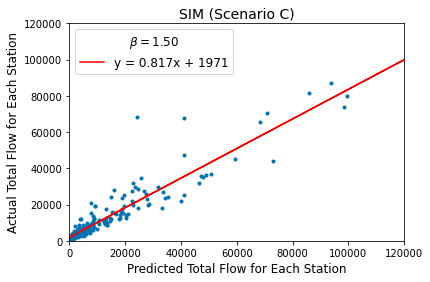

<Figure size 432x288 with 0 Axes>

In [87]:
# s3 vs. original
X = data_all["Total_Commuters_ScenarioC"]
Y = data_all["Total_Commuters"]

plt.xlabel("Predicted Total Flow for Each Station", fontsize=12)
plt.ylabel("Actual Total Flow for Each Station", fontsize=12)
plt.title("SIM (Scenario C)", fontsize=14)

plt.plot(X,Y,'.')
plt.xlim(0,120000)
plt.ylim(0,120000)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

plt.plot(X, X*slope + intercept, 'r', label = 'y = 0.817x + 1971') 

plt.legend(fontsize = 12, title = "$\\beta=1.50$", title_fontsize=12, loc='upper left')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p2_SC.png', dpi=100)